# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [151]:
# Import library yang diperlukan,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Menyiapkan data yang akan diguankan

In [152]:
# Load dataset
df = pd.read_csv('employee_data.csv')
# Menampilkan informasi awal dataset
print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Ukuran dataset: (1470, 35)
Jumlah baris: 1470
Jumlah kolom: 35


## Data Understanding

In [153]:
# Menampilkan 5 baris pertama data
print("5 Baris Pertama Dataset:")
df.head()

5 Baris Pertama Dataset:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [154]:
# Informasi umum tentang dataset,
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   in

In [155]:
# Statistik deskriptif untuk variabel numerik
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [156]:
# Mengecek missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing Count'] > 0]

Missing Values:


,Missing Count,Percentage
Attrition,412,28.027211


Distribusi Attrition:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64
nPersentase Attrition: 12.18%


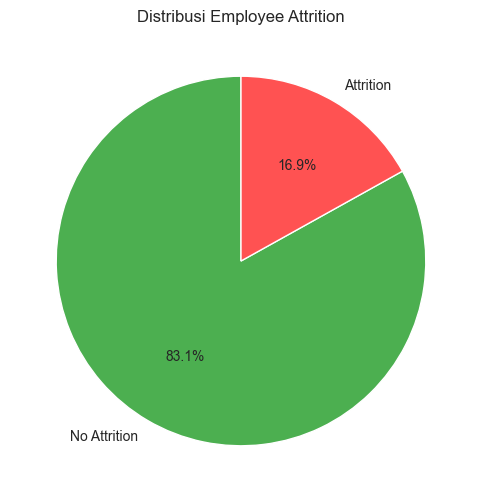

In [157]:
# Mengecek distribusi target variable (Attrition)
print("Distribusi Attrition:")
attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)
print(f"nPersentase Attrition: {(attrition_counts[1] / len(df)) * 100:.2f}%")
# Visualisasi distribusi Attrition
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts.values, labels=['No Attrition', 'Attrition'],
        autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5252'])
plt.title('Distribusi Employee Attrition')
plt.show()

In [158]:
# Analisis variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variabel Kategorikal: {categorical_cols}")
print("nUnique values untuk setiap variabel kategorikal:")
for col in categorical_cols:
     print(f"n{col}: {df[col].nunique()} unique values")
     print(df[col].value_counts())

Variabel Kategorikal: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
nUnique values untuk setiap variabel kategorikal:
nBusinessTravel: 3 unique values
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
nDepartment: 3 unique values
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
nEducationField: 6 unique values
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
nGender: 2 unique values
Gender
Male      882
Female    588
Name: count, dtype: int64
nJobRole: 9 unique values
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manage

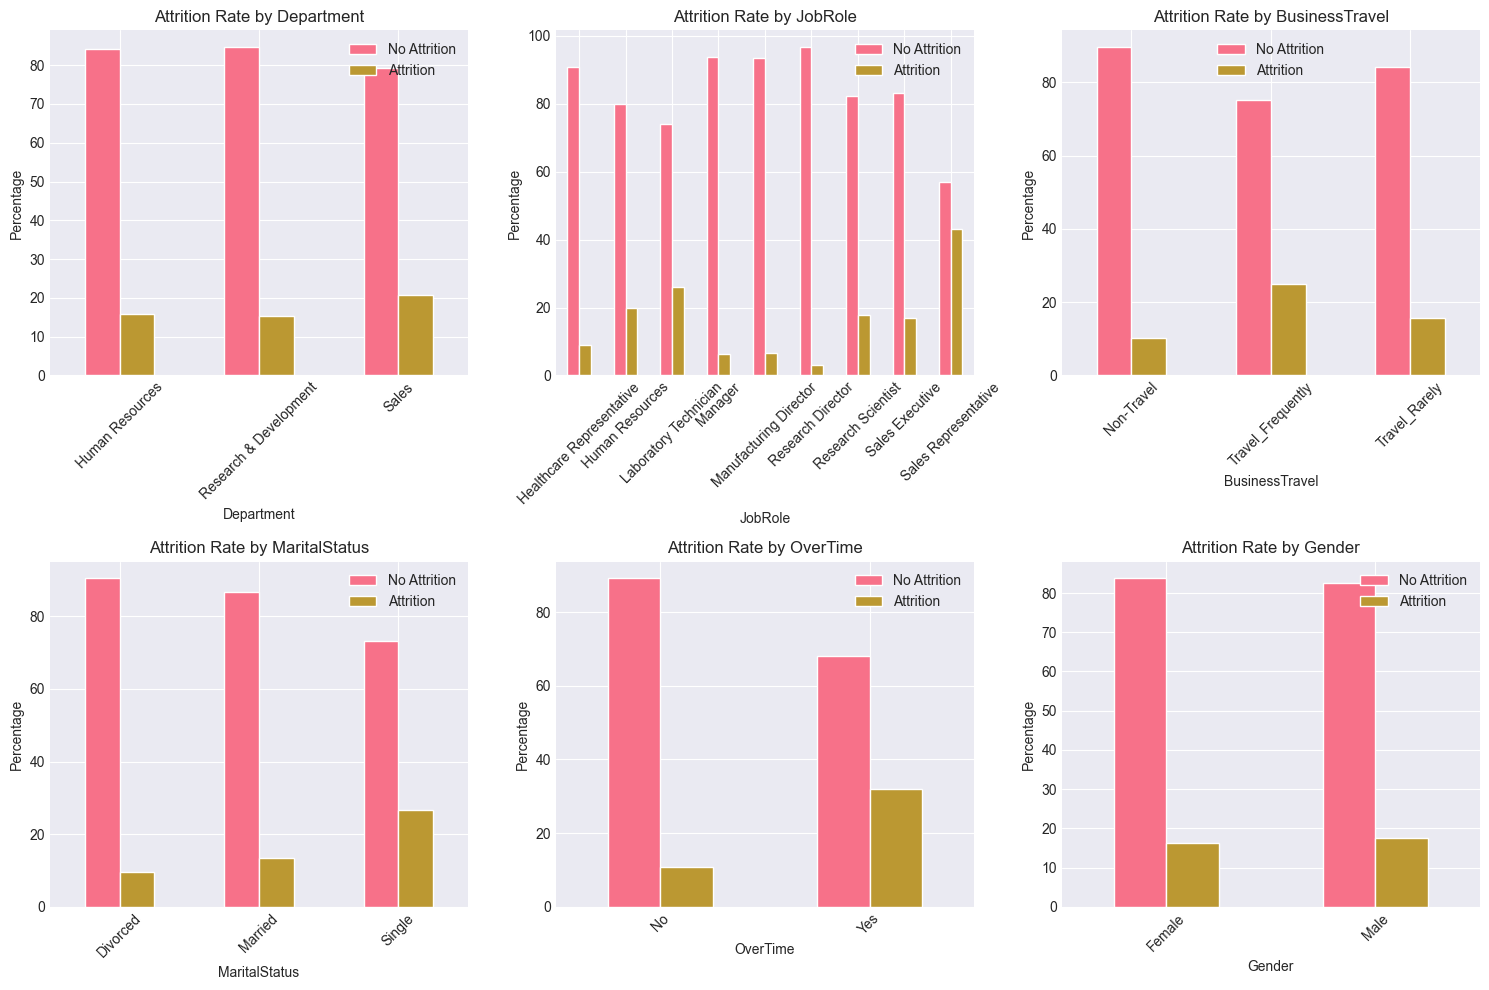

In [159]:
# Visualisasi hubungan Attrition dengan variabel kategorikal penting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
important_cat_vars = ['Department', 'JobRole', 'BusinessTravel',
                      'MaritalStatus', 'OverTime', 'Gender']
for idx, col in enumerate(important_cat_vars):
    crosstab = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[idx], rot=45)
    axes[idx].set_title(f'Attrition Rate by {col}')
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(['No Attrition', 'Attrition'])
plt.tight_layout()
plt.show()

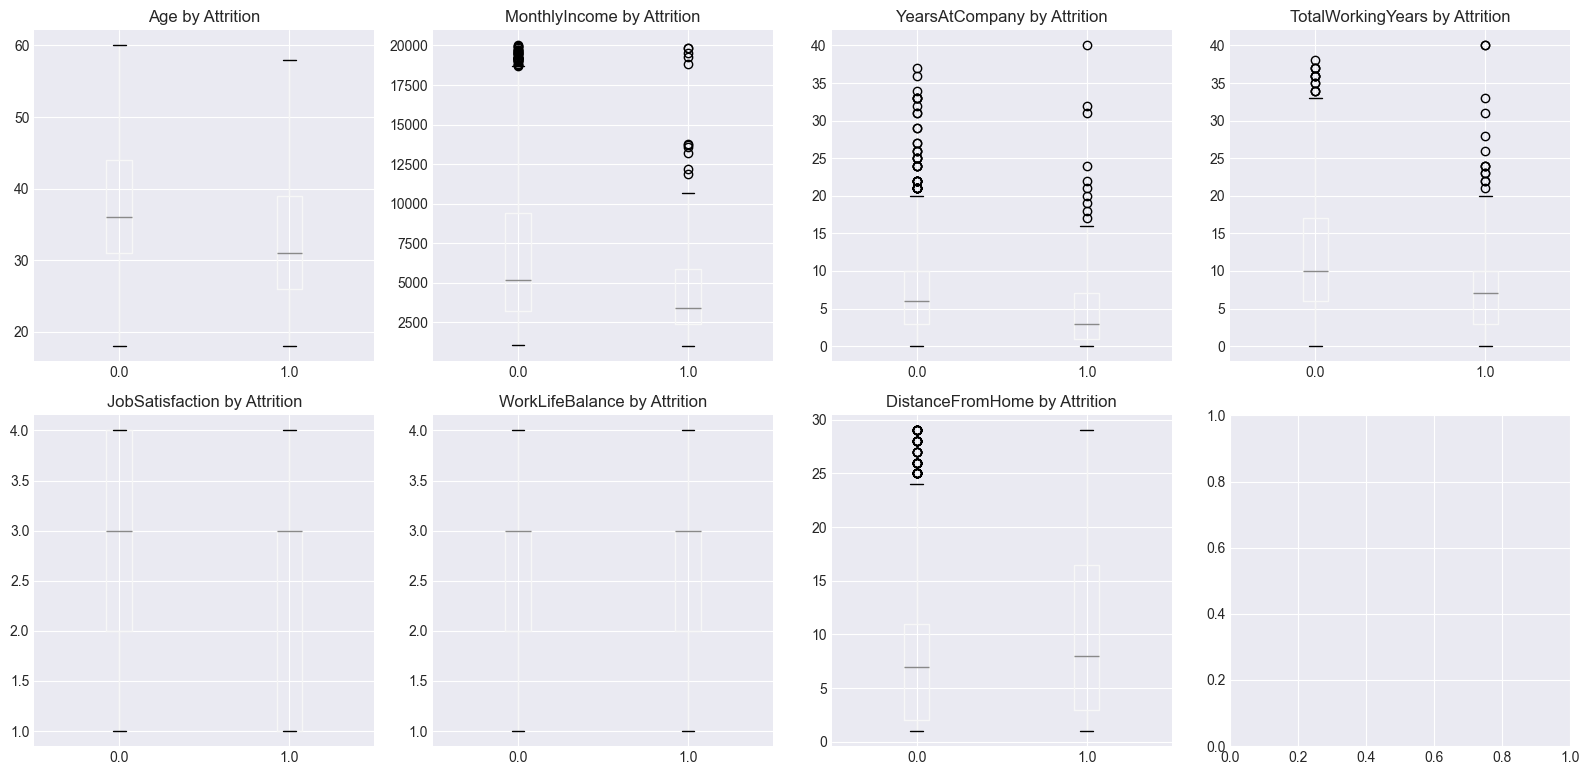

In [160]:
# Analisis variabel numerik terhadap Attrition
numerical_cols = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears',
                  'JobSatisfaction', 'WorkLifeBalance', 'DistanceFromHome']
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='Attrition', ax=axes[idx])
    axes[idx].set_title(f'{col} by Attrition')
    axes[idx].set_xlabel('')
plt.suptitle('')
plt.tight_layout()
plt.show()

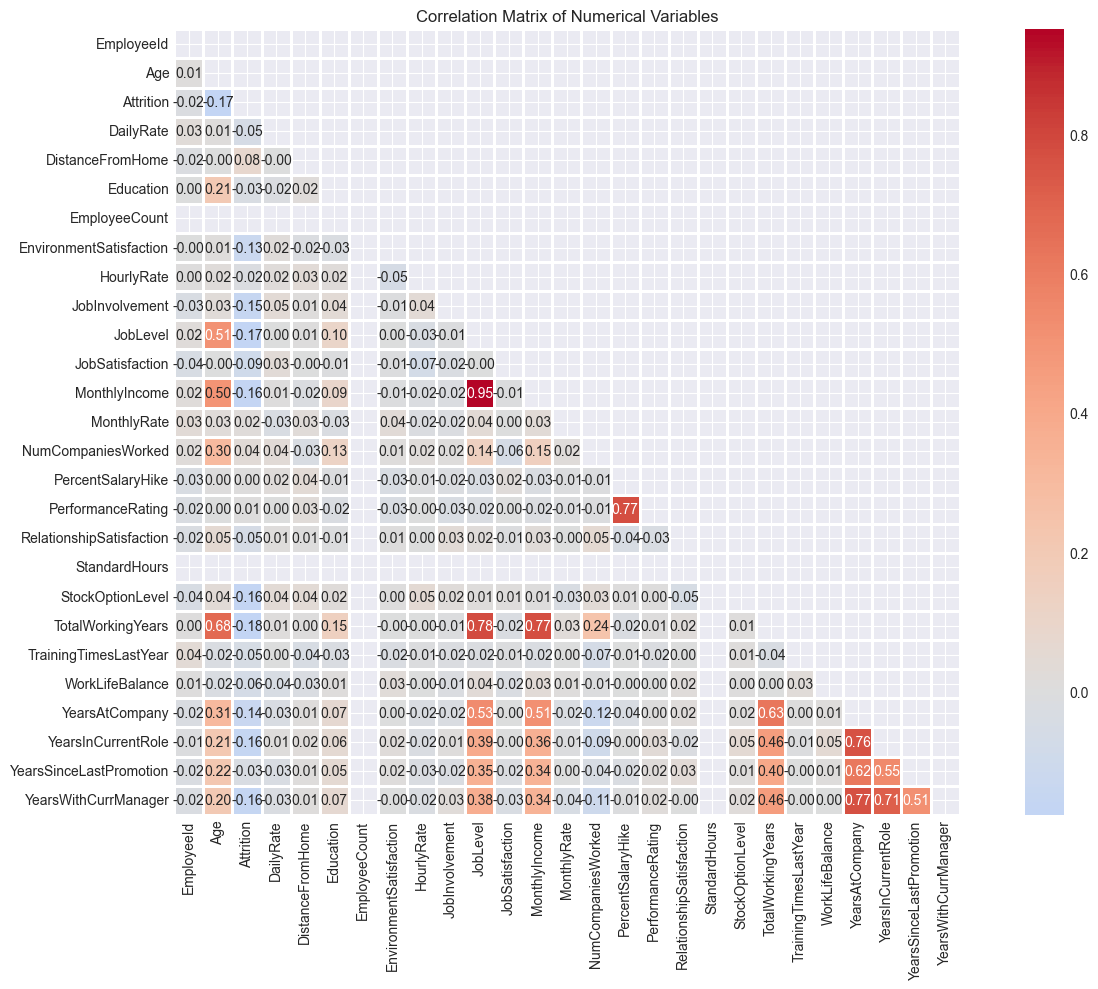

In [161]:
# Correlation matrix untuk variabel numerik
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [162]:
# Membuat copy dataset untuk preprocessing
df_processed = df.copy()

# Cek tipe data dan unique values dari Attrition
print("Tipe data Attrition:", df['Attrition'].dtype)
print("Unique values:", df['Attrition'].unique())
print("Missing values:", df['Attrition'].isnull().sum())

# Konversi Attrition berdasarkan kemungkinan format
if df['Attrition'].dtype == 'object':
    # Jika Attrition adalah string 'Yes'/'No'
    df_processed['Attrition'] = df_processed['Attrition'].map({'No': 0, 'Yes': 1})
elif df['Attrition'].dtype in ['float64', 'float32']:
    # Jika Attrition sudah float tapi ada NaN
    # Handle missing values dulu
    if df_processed['Attrition'].isnull().sum() > 0:
        print(f"Warning: {df_processed['Attrition'].isnull().sum()} missing values found in Attrition")
        # Drop rows dengan missing Attrition atau isi dengan mode
        df_processed = df_processed.dropna(subset=['Attrition'])
        print(f"Rows after dropping NaN: {len(df_processed)}")
    # Konversi ke int
    df_processed['Attrition'] = df_processed['Attrition'].astype(int)
else:
    # Jika sudah int, tidak perlu konversi
    pass

print("\nTarget variable (Attrition) telah dikonversi ke binary format")
print("Distribusi Attrition setelah konversi:")
print(df_processed['Attrition'].value_counts())

Tipe data Attrition: float64
Unique values: [nan  1.  0.]
Missing values: 412
Rows after dropping NaN: 1058

Target variable (Attrition) telah dikonversi ke binary format
Distribusi Attrition setelah konversi:
Attrition
0    879
1    179
Name: count, dtype: int64


In [163]:
# Identifikasi kolom yang tidak relevan untuk modeling
# EmployeeId adalah identifier, tidak berguna untuk prediksi
# EmployeeCount, Over18, StandardHours memiliki nilai yang sama untuk semua records
columns_to_drop = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
# Drop kolom yang tidak relevan
df_processed = df_processed.drop(columns=columns_to_drop)
print(f"Kolom yang dihapus: {columns_to_drop}")
print(f"Jumlah kolom setelah preprocessing: {df_processed.shape[1]}")

Kolom yang dihapus: ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
Jumlah kolom setelah preprocessing: 31


In [164]:
# Encode variabel kategorikal
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Variabel kategorikal yang akan di-encode: {categorical_columns}")
# Menggunakan Label Encoding untuk variabel ordinal
ordinal_mappings = {
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
    'OverTime': {'No': 0, 'Yes': 1}
}
for col, mapping in ordinal_mappings.items():
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(mapping)
# One-hot encoding untuk variabel kategorikal non-ordinal
nominal_cols = [col for col in categorical_columns if col not in ordinal_mappings.keys()]
df_processed = pd.get_dummies(df_processed, columns=nominal_cols, prefix=nominal_cols, drop_first=True)
print(f"Jumlah fitur setelah encoding: {df_processed.shape[1]}")

Variabel kategorikal yang akan di-encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Jumlah fitur setelah encoding: 44


In [165]:
# Memisahkan features dan target
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Distribusi target variable:")
print(y.value_counts())

Shape of X: (1058, 43)
Shape of y: (1058,)
Distribusi target variable:
Attrition
0    879
1    179
Name: count, dtype: int64


In [166]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Testing set size: {X_test.shape}")
print(y_train.value_counts())
print(f"Distribusi target di testing set:")
print(y_test.value_counts())

Training set size: (846, 43)
Testing set size: (212, 43)
Testing set size: (212, 43)
Attrition
0    703
1    143
Name: count, dtype: int64
Distribusi target di testing set:
Attrition
0    176
1     36
Name: count, dtype: int64


In [167]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert back to DataFrame untuk memudahkan analisis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print("Feature scaling selesai dilakukan")

Feature scaling selesai dilakukan


## Modeling

In [168]:
# Definisikan model-model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}
# Dictionary untuk menyimpan hasil
results = {}
# Training dan evaluasi setiap model
for name, model in models.items():
    print(f"Training {name}...")
     # Training model
    model.fit(X_train_scaled, y_train)
     # Prediksi
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_scores': cv_scores,
        'cv_scores_mean': np.mean(cv_scores),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...
Accuracy: 0.8632
ROC AUC: 0.8419
CV Score: 0.8499 (+/- 0.0031)


In [169]:
# Hyperparameter tuning untuk model terbaik (Random Forest)
print("Melakukan hyperparameter tuning untuk Random Forest...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5,
    scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")
# Gunakan model terbaik
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")

Melakukan hyperparameter tuning untuk Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.7936
Test Accuracy: 0.8443
Test Accuracy: 0.8443
Test ROC AUC: 0.8190


Top 10 Most Important Features:
              feature  importance
10      MonthlyIncome    0.066718
0                 Age    0.066433
13           OverTime    0.064604
2           DailyRate    0.055990
18  TotalWorkingYears    0.053493
11        MonthlyRate    0.051409
6          HourlyRate    0.042961
3    DistanceFromHome    0.042873
17   StockOptionLevel    0.038634
21     YearsAtCompany    0.037805


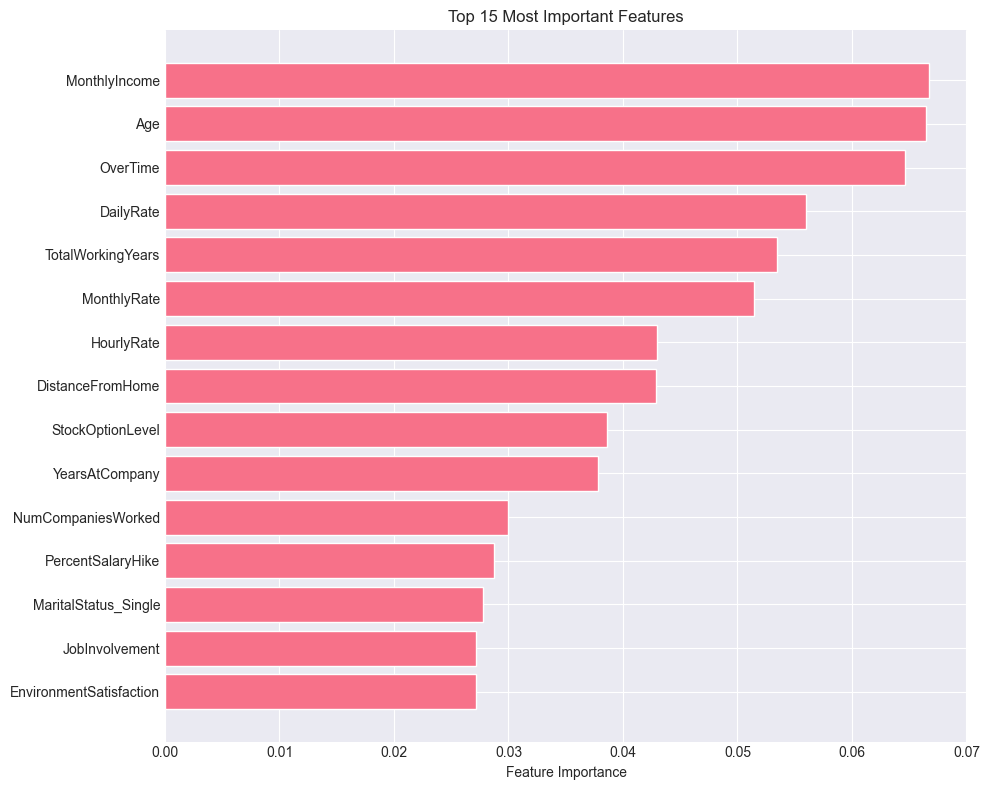

In [170]:
# Feature importance dari Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)
# Visualisasi top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

## Evaluation

Perbandingan Performa Model:
                 Model  Accuracy   ROC AUC
3                  SVM  0.863208  0.841856
0  Logistic Regression  0.872642  0.820549
2        Random Forest  0.853774  0.818892
1        Decision Tree  0.745283  0.581439


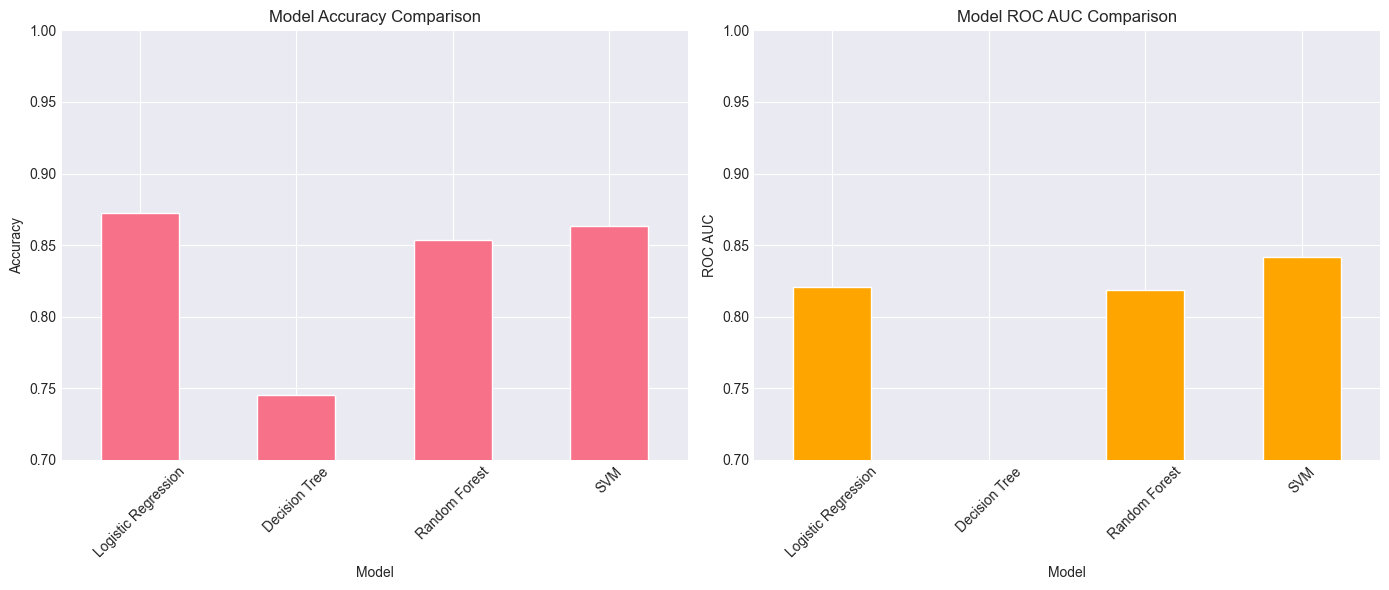

In [171]:
# ✅ KODE BARU YANG SUDAH DIPERBAIKI - GUNAKAN INI
# Perbandingan performa semua model
# Check if results exists and has the expected structure
if 'results' in locals() and len(results) > 0:
    # Build comparison dataframe with available metrics
    comparison_data = {
        'Model': list(results.keys()),
        'Accuracy': [results[m]['accuracy'] for m in results.keys()],
        'ROC AUC': [results[m]['roc_auc'] for m in results.keys()]
    }

    # Add CV scores if available
    first_model = list(results.keys())[0]
    if 'cv_mean' in results[first_model]:
        comparison_data['CV Mean'] = [results[m]['cv_mean'] for m in results.keys()]
        comparison_data['CV Std'] = [results[m]['cv_std'] for m in results.keys()]

    comparison_df = pd.DataFrame(comparison_data)

    print("Perbandingan Performa Model:")
    print(comparison_df.sort_values('ROC AUC', ascending=False))

    # Visualisasi perbandingan
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Accuracy comparison
    comparison_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax1, legend=False)
    ax1.set_title('Model Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0.7, 1.0)
    ax1.set_xticklabels(comparison_df['Model'], rotation=45)

    # ROC AUC comparison
    comparison_df.plot(x='Model', y='ROC AUC', kind='bar', ax=ax2, legend=False, color='orange')
    ax2.set_title('Model ROC AUC Comparison')
    ax2.set_ylabel('ROC AUC')
    ax2.set_ylim(0.7, 1.0)
    ax2.set_xticklabels(comparison_df['Model'], rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Results not found. Please run the modeling section first.")

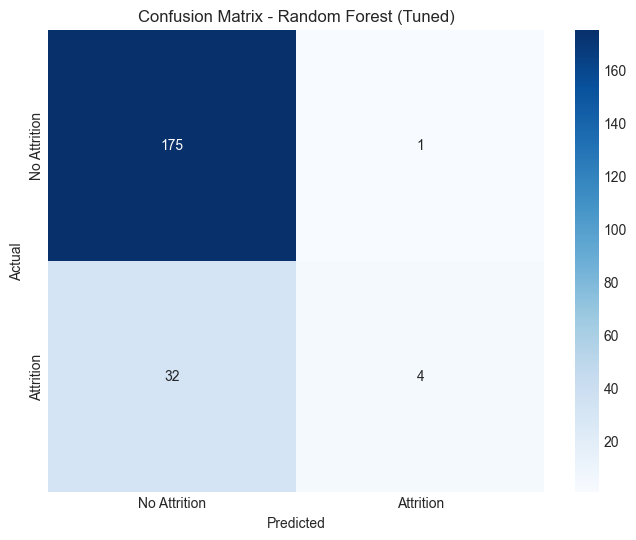

Classification Report - Random Forest (Tuned):
              precision    recall  f1-score   support

No Attrition       0.85      0.99      0.91       176
   Attrition       0.80      0.11      0.20        36

    accuracy                           0.84       212
   macro avg       0.82      0.55      0.55       212
weighted avg       0.84      0.84      0.79       212



In [172]:
# Confusion Matrix untuk model terbaik
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# Classification Report
print("Classification Report - Random Forest (Tuned):")
print(classification_report(y_test, y_pred_best,
                            target_names=['No Attrition', 'Attrition']))


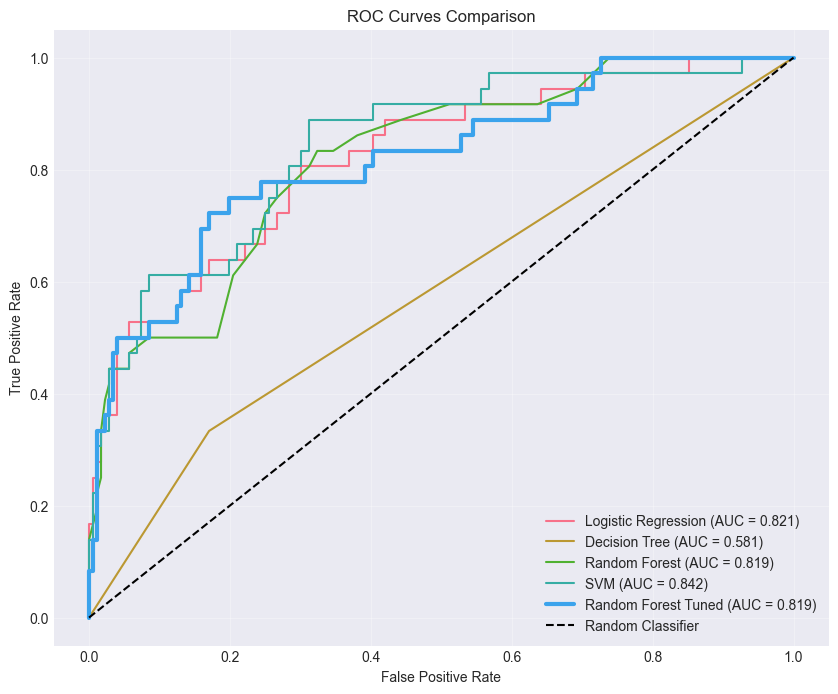

In [173]:
# ROC Curves untuk semua model
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')
# ROC curve untuk model terbaik (tuned)
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
plt.plot(fpr_best, tpr_best, linewidth=3,
         label=f'Random Forest Tuned (AUC = {roc_auc_score(y_test, y_pred_proba_best):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [174]:
# Business Impact Analysis
print("=== Business Impact Analysis ===")
print("Kesimpulan Model:")
print(f"- Model terbaik: Random Forest (Tuned)")
print(f"- Accuracy: {accuracy_score(y_test, y_pred_best):.2%}")
print(f"- ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.3f}")
# Calculate business metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Metrik Bisnis:")
print(f"- Precision (untuk Attrition): {precision:.2%}")
print(f"- Recall (untuk Attrition): {recall:.2%}")
print(f"- F1-Score: {f1:.3f}")
print(f"Dari {len(y_test)} karyawan di test set:")
print(f"- Model berhasil mengidentifikasi {tp} dari {tp+fn} karyawan yang akan resign")
print(f"- Model salah memprediksi {fp} karyawan akan resign padahal tidak")
# Cost-benefit analysis (asumsi)
cost_of_turnover = 50000  # Biaya pergantian karyawan (dalam USD)
cost_of_retention_program = 5000  # Biaya program retensi per karyawan
savings = tp * (cost_of_turnover - cost_of_retention_program)
false_cost = fp * cost_of_retention_program
net_benefit = savings - false_cost
print(f"Analisis Cost-Benefit (Asumsi):")
print(f"- Biaya pergantian karyawan: ${cost_of_turnover:,}")
print(f"- Biaya program retensi: ${cost_of_retention_program:,}")
print(f"- Potential savings: ${savings:,}")
print(f"- False positive cost: ${false_cost:,}")
print(f"- Net benefit: ${net_benefit:,}")
print("Rekomendasi:")
print("1. Fokus pada karyawan dengan probabilitas attrition tinggi (>0.7)")
print("2. Perhatikan faktor-faktor penting: Overtime, Age, Monthly Income")
print("3. Implementasikan program retensi yang targeted")
print("4. Monitor dan evaluasi model secara berkala")

=== Business Impact Analysis ===
Kesimpulan Model:
- Model terbaik: Random Forest (Tuned)
- Accuracy: 84.43%
- ROC AUC: 0.819
Metrik Bisnis:
- Precision (untuk Attrition): 80.00%
- Recall (untuk Attrition): 11.11%
- F1-Score: 0.195
Dari 212 karyawan di test set:
- Model berhasil mengidentifikasi 4 dari 36 karyawan yang akan resign
- Model salah memprediksi 1 karyawan akan resign padahal tidak
Analisis Cost-Benefit (Asumsi):
- Biaya pergantian karyawan: $50,000
- Biaya program retensi: $5,000
- Potential savings: $180,000
- False positive cost: $5,000
- Net benefit: $175,000
Rekomendasi:
1. Fokus pada karyawan dengan probabilitas attrition tinggi (>0.7)
2. Perhatikan faktor-faktor penting: Overtime, Age, Monthly Income
3. Implementasikan program retensi yang targeted
4. Monitor dan evaluasi model secara berkala


In [175]:
# Filter kolom yang memang ada
categorical_cols = [col for col in categorical_cols if col in X_train.columns]
numerical_cols = [col for col in numerical_cols if col in X_train.columns]

# Buat preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Buat pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', best_model)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Simpan
joblib.dump(pipeline, 'attrition_pipeline.pkl')
print("✅ Pipeline dengan preprocessing berhasil disimpan.")


✅ Pipeline dengan preprocessing berhasil disimpan.
